In [10]:
api_key='d97a3d6087394870b4ccb6616fe18905'

In [11]:
import newsapi
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)
from pandas.io.json import json_normalize
import pandas as pd
pd.set_option('display.max_colwidth', -1)
import pprint as pp
import requests
from bs4 import BeautifulSoup
import yfinance as yf

In [12]:
def top_headlines():
    country=input("Which country are you interested in?")
    category=input("""Which category are you interested in? \nHere are the categories to choose from: 
                   \nbusiness\nentertainment\ngeneral\nhealth\nscience\ntechnology""")
    
    top_headlines = newsapi.get_top_headlines(category=category,language='en',country=country)
    top_headlines=json_normalize(top_headlines['articles'])
    newdf=top_headlines[["title","url"]]
    dic=newdf.set_index('title')['url'].to_dict()
    top_headlines
    print("Here are some of the top articles\n\n")
    for (k,v) in dic.items():
        print(k+"\n\n"+v)
        #urn (top_headlines.url(10),top_headlines['title'].head(10),top_headlines['description'].head(10),top_headlines['content'].head(10))

In [13]:
import datetime
#datetime.datetime.now().date()
from datetime import datetime, timedelta
def date(base):
    date_list=[]
    yr=datetime.today().year
    if (yr%400)==0 or ((yr%100!=0) and (yr%4==0)):
        numdays=366
        date_list.append([base - timedelta(days=x) for x in range(366)])
    else:
        numdays=365
        date_list.append([base - timedelta(days=x) for x in range(365)])
    newlist=[]
    for i in date_list:
        for j in sorted(i):
            newlist.append(j)
    return newlist

def last_30(base):

    date_list=[base - timedelta(days=x) for x in range(30)]
    #newlist=[]
    #for i in sorted(date_list):
    #    newlist.append(j)
    return sorted(date_list)


def from_dt(x):
    from_dt=[]
    for i in range(len(x)):
        from_dt.append(last_30(datetime.today())[i-1].date())
        #to_dt=date(datetime.today())[i+1].date()
    return from_dt
        
def to_dt(x):
    to_dt=[]
    for i in range(len(x)):
        #from_dt=date(datetime.today())[i].date()
        to_dt.append(last_30(datetime.today())[i].date())
    return to_dt
from_list=from_dt(last_30(datetime.today()))
to_list=to_dt(last_30(datetime.today()))

In [63]:
def func(query):
    newdf=pd.DataFrame()
    for (from_dt,to_dt) in zip(from_list,to_list):
        all_articles = newsapi.get_everything(q=query,language='en',sort_by='relevancy', page_size=5,   from_param='2021-01-20',to='2021-02-15')
        d=json_normalize(all_articles['articles'])
        d['stock_name']=query
        newdf=newdf.append(d)
    return newdf

In [106]:
def func(query):
    newdf=pd.DataFrame()
    for (from_dt,to_dt) in zip(from_list,to_list):
        all_articles = newsapi.get_everything(q=query,language='en',sort_by='relevancy', page_size=10,   from_param='2021-01-19',to='2021-02-18')
        d=json_normalize(all_articles['articles'])
        d['stock_name']=query
        newdf=newdf.append(d)
    return newdf

In [107]:
aapl=pd.DataFrame(func('Apple stock')) 
lst=['AAPL','TSLA','GOOGL','NFLX','MSFT','AMZN','DIS','BAC','GM','FB']


In [108]:
#Searching for a particular topic
tsla=pd.DataFrame(func('Tesla stock')) 
googl=pd.DataFrame(func('Google stock')) 
nflx=pd.DataFrame(func('Netflix stock')) 
msft=pd.DataFrame(func('Microsoft stock')) 
amzn=pd.DataFrame(func('Amazon Stock')) 
dis=pd.DataFrame(func('Disney stock')) 
bac=pd.DataFrame(func('Bank of America stock')) 
gm=pd.DataFrame(func('General Motors stock')) 
fb=pd.DataFrame(func('Facebook Stock')) 
stocks=aapl.append(tsla)
stocks=stocks.append(googl)
stocks=stocks.append(nflx)
stocks=stocks.append(msft)
stocks=stocks.append(amzn)
stocks=stocks.append(dis)
stocks=stocks.append(bac)
stocks=stocks.append(gm)
stocks=stocks.append(fb)


In [109]:
stocks.to_csv('stocks.csv',index=False)

In [110]:
stocks['stock_name'].unique()

array(['Apple stock', 'Tesla stock', 'Google stock', 'Netflix stock',
       'Microsoft stock', 'Amazon Stock', 'Disney stock',
       'Bank of America stock', 'General Motors stock', 'Facebook Stock'],
      dtype=object)

In [111]:
stocks['description'].nunique()

81

In [24]:
stocks=aapl.append(tsla)
stocks=stocks.append(googl)
stocks=stocks.append(nflx)
stocks=stocks.append(msft)
stocks=stocks.append(amzn)
stocks=stocks.append(dis)
stocks=stocks.append(bac)
stocks=stocks.append(gm)
stocks=stocks.append(fb)
stocks.to_csv('stocks.csv',mode='w',index=False)

In [99]:
stocks['stock_name'].nunique()

10

In [151]:
##python chunk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def analyze_sentiment_vader_lexicon(article_title, stock_name,
                                    threshold=0.1,
                                    verbose=False):
    
    # analyze the sentiment for review
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(article_title)
    # get aggregate scores and final sentiment
    agg_score = scores['compound']
    final_sentiment = 'positive' if agg_score >= threshold\
                                   else 'negative'
    df=pd.DataFrame()
    if verbose:
        # display detailed sentiment statistics
        positive = str(round(scores['pos'], 2)*100)+'%'
        final = round(agg_score, 2)
        negative = str(round(scores['neg'], 2)*100)+'%'
        neutral = str(round(scores['neu'], 2)*100)+'%'
        article_title=article_title
        stock_name=stock_name
        sentiment_frame = pd.DataFrame([[article_title,stock_name, final_sentiment, final, positive,
                                        negative, neutral]])
        print(sentiment_frame)
        df=df.append(sentiment_frame)
    
    return df

In [152]:
stocks1=stocks.drop_duplicates(subset ="title")

In [185]:
import numpy as np
title=np.array(stocks1['title'])
stock=np.array(stocks1['stock_name'])
df=pd.DataFrame()
columns=pd.MultiIndex(levels=[['SENTIMENT STATS:'], 
                                                                      ['Article_Title','Stock_name','Predicted Sentiment', 'Polarity Score',
                                                                       'Positive', 'Negative', 'Neutral']], 
                                                              codes=[[0,0,0,0,0,0,0],[0,1,2,3,4,5,6]])
for i,j in zip(title,stock):
    print("Stock name: "+j)
    print("\nNews Article: "+ i+"\n")
    pred = analyze_sentiment_vader_lexicon(i, j, threshold=0.0, verbose=True)
    df=df.append(pred)
    
    print('-'*100)
df.rename(columns={"0": "News Article Title","1":"Stock_name","2":"Predicted Sentiment","3":"Polarity Score","4":"Positive",
                   "5":"Negative","6":"Neutral"})

Stock name: Apple stock

News Article: Investors don’t seem that impressed by Apple’s $111 billion quarter

                                                                     0  \
0  Investors don’t seem that impressed by Apple’s $111 billion quarter   

             1         2     3      4     5      6  
0  Apple stock  positive  0.48  26.0%  0.0%  74.0%  
----------------------------------------------------------------------------------------------------
Stock name: Apple stock

News Article: Here are the best investing app alternatives to Robinhood

                                                           0            1  \
0  Here are the best investing app alternatives to Robinhood  Apple stock   

          2     3      4     5      6  
0  positive  0.64  34.0%  0.0%  66.0%  
----------------------------------------------------------------------------------------------------
Stock name: Apple stock

News Article: Apple's iPad Air is $40 cheaper at Amazon

                    

----------------------------------------------------------------------------------------------------
Stock name: Netflix stock

News Article: Futures drop as short squeeze worries resurface - Reuters UK

                                                              0  \
0  Futures drop as short squeeze worries resurface - Reuters UK   

               1         2    3     4      5      6  
0  Netflix stock  negative -0.6  0.0%  41.0%  59.0%  
----------------------------------------------------------------------------------------------------
Stock name: Microsoft stock

News Article: US STOCKS-Futures fall with earnings underway, eyes on Fed - Reuters

                                                                      0  \
0  US STOCKS-Futures fall with earnings underway, eyes on Fed - Reuters   

                 1         2    3     4     5       6  
0  Microsoft stock  positive  0.0  0.0%  0.0%  100.0%  
----------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
Stock name: Bank of America stock

News Article: File-sharing firm WeTransfer hires banks for Amsterdam IPO - sources - Reuters

                                                                                0  \
0  File-sharing firm WeTransfer hires banks for Amsterdam IPO - sources - Reuters   

                       1         2    3     4     5       6  
0  Bank of America stock  positive  0.0  0.0%  0.0%  100.0%  
----------------------------------------------------------------------------------------------------
Stock name: Bank of America stock

News Article: Bank of America's top oil and gas researcher explains why now is the time to invest in energy and names his 15 top stock picks — including 3 that can't be beat

                                                                                                                                                                 0  

,0,1,2,3,4,5,6
0,Investors don’t seem that impressed by Apple’s $111 billion quarter,Apple stock,positive,0.48,26.0%,0.0%,74.0%
0,Here are the best investing app alternatives to Robinhood,Apple stock,positive,0.64,34.0%,0.0%,66.0%
0,Apple's iPad Air is $40 cheaper at Amazon,Apple stock,positive,0.18,20.0%,0.0%,81.0%
0,Where to find the best deals on refurbished Apple iPhones,Apple stock,positive,0.64,32.0%,0.0%,68.0%
0,"Wattpad, the storytelling platform, is selling to South Korea’s Naver for $600 million",Apple stock,positive,0.00,0.0%,0.0%,100.0%
...,...,...,...,...,...,...,...
0,Facebook shuts popular stock trading group amid GameStop frenzy - Reuters,Facebook Stock,positive,0.13,21.0%,18.0%,61.0%
0,"Robinhood no longer allows users to buy GameStop, AMC, BlackBerry shares",Facebook Stock,positive,0.00,16.0%,16.0%,67.0%
0,Facebook building smartwatch with health features: The Information - Reuters,Facebook Stock,positive,0.00,0.0%,0.0%,100.0%
0,Analysis: GameStop's 'Reddit rally' puts scrutiny on social media forums - Reuters,Facebook Stock,positive,0.00,0.0%,0.0%,100.0%


In [186]:
df.rename(columns={0: "News Article Title",1:"Stock_name",2:"Predicted Sentiment",3:"Polarity Score",4:"Positive",
                   5:"Negative",6:"Neutral"},inplace=True)

df['Positive']=df['Positive'].str.rstrip('%'). astype('float') / 100.0
df['Negative']=df['Negative'].str.rstrip('%'). astype('float') / 100.0
positive = pd.pivot_table(df, values='Positive', index=['Stock_name'], aggfunc=np.mean)
negative= pd.pivot_table(df, values='Negative', index=['Stock_name'], aggfunc=np.mean)

df.head()

,News Article Title,Stock_name,Predicted Sentiment,Polarity Score,Positive,Negative,Neutral
0,Investors don’t seem that impressed by Apple’s $111 billion quarter,Apple stock,positive,0.48,0.26,0.0,74.0%
0,Here are the best investing app alternatives to Robinhood,Apple stock,positive,0.64,0.34,0.0,66.0%
0,Apple's iPad Air is $40 cheaper at Amazon,Apple stock,positive,0.18,0.20,0.0,81.0%
0,Where to find the best deals on refurbished Apple iPhones,Apple stock,positive,0.64,0.32,0.0,68.0%
0,"Wattpad, the storytelling platform, is selling to South Korea’s Naver for $600 million",Apple stock,positive,0.00,0.00,0.0,100.0%


In [187]:
negative=negative.reset_index()
import seaborn as sns

TypeError: bar() missing 1 required positional argument: 'height'

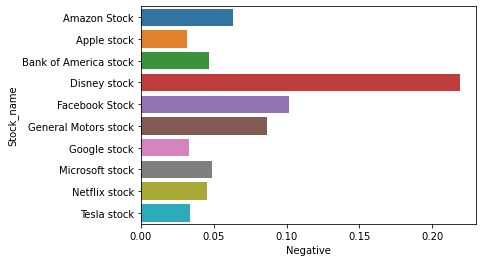

In [193]:

sns.barplot(x=negative['Negative'], y=negative['Stock_name'])


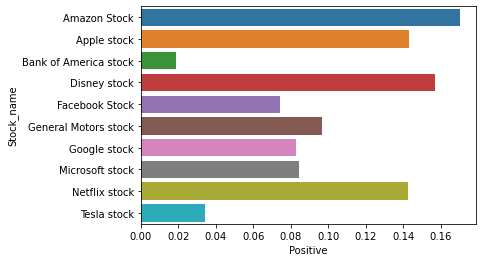

In [196]:
positive =positive.reset_index()
sns.barplot(x=positive['Positive'], y=positive['Stock_name'])
